In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
area_fractions = {6: 98.41, 11: 36.38, 16: 6.3, 22: 0.45}
max_cd = {1: 60, 5: 25, 50: 25, 100: 25}
def get_data(img_id, Lz):
    data = pd.read_csv(f"data/frequency-{img_id}-{Lz}.csv")
    arr1 = data[['vleft [A/m2]', 'freql']].to_numpy()
    arr2 = data[['vleft [A/m2]', 'freqr']].to_numpy()

    return arr1, arr2

### Frequency Distribution of Currant Density for Thickness = 85.1 $\mu m$ and $\frac{A}{A_0} = 0.3638$

In [3]:
def make_plot(img_id, Lz):
    try:
        arr1, arr2 = get_data(img_id, Lz)
    except Exception:
        return
    fig, ax = plt.subplots(1, 2, figsize=(10, 4.5))
    ax[0].hist(arr1[:-1, 0], arr1[:, 0], weights=arr1[:-1, 1]);
    if Lz == 5 and img_id == 11:
        ax[0].set_xlim([10, 15]);
    elif Lz == 5 and img_id == 16:
        ax[0].set_xlim([10, 17.5]);
    elif Lz == 50:
        ax[0].set_xlim([0, 25]);
    elif Lz == 100:
        ax[0].set_xlim([0, 25]);
    else:
        ax[0].set_xlim([0, max_cd[Lz]]);
    ax[0].set_ylabel('frequency')
    ax[0].set_xlabel(r'$i\ [Am^{-2}]$')
    ax[0].set_title('Left: ' + r'$L_z$' + f' = {Lz} $\mu m$, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}')
    ax[1].hist(arr2[:-1, 0], arr2[:, 0], weights=arr2[:-1, 1]);
    if Lz == 1 and img_id == 6:
        ax[1].set_xlim([0, max_cd[Lz]]);
    else:
        ax[1].set_xlim([0, 1.5]);
    ax[1].set_ylabel('frequency')
    ax[1].set_xlabel(r'$i\ [Am^{-2}]$')
    ax[1].set_title('Right: ' + r'$L_z$' + f' = {Lz} $\mu m$, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}')
    # fig.suptile(r'$L_z$' + f' = {Lz}, ' + r'$\frac{A}{A_0}=$' + f' {area_fractions[img_id]}')
    plt.tight_layout()
    plt.savefig(f'figures/frequency-{img_id}-{Lz}.png', dpi=1500)

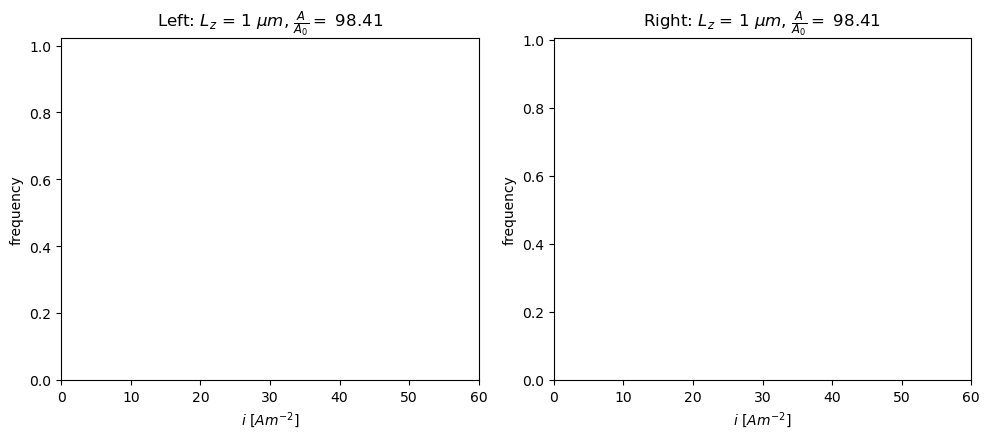

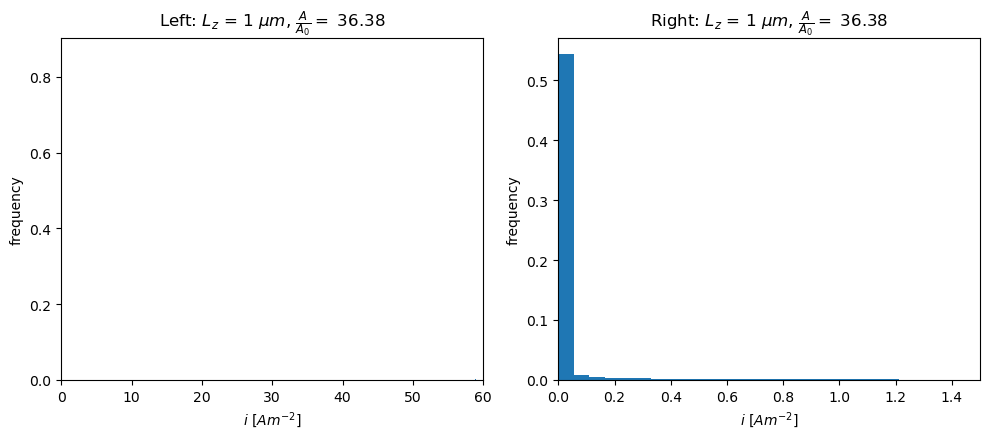

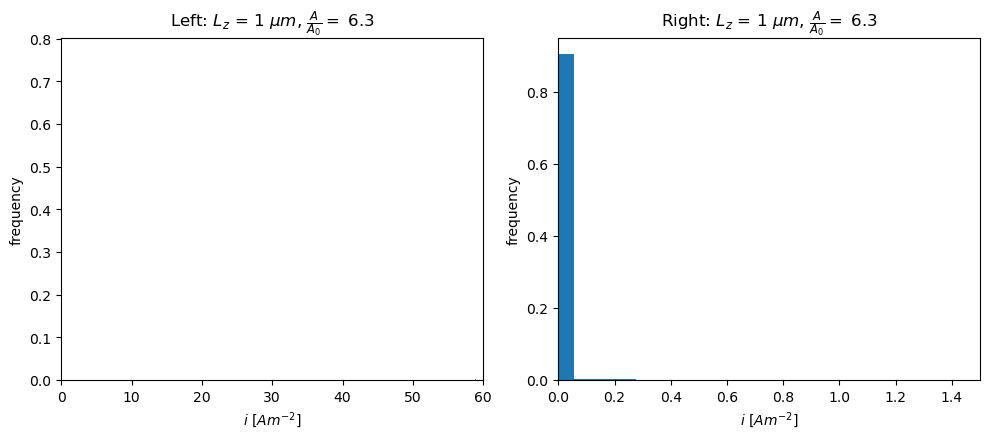

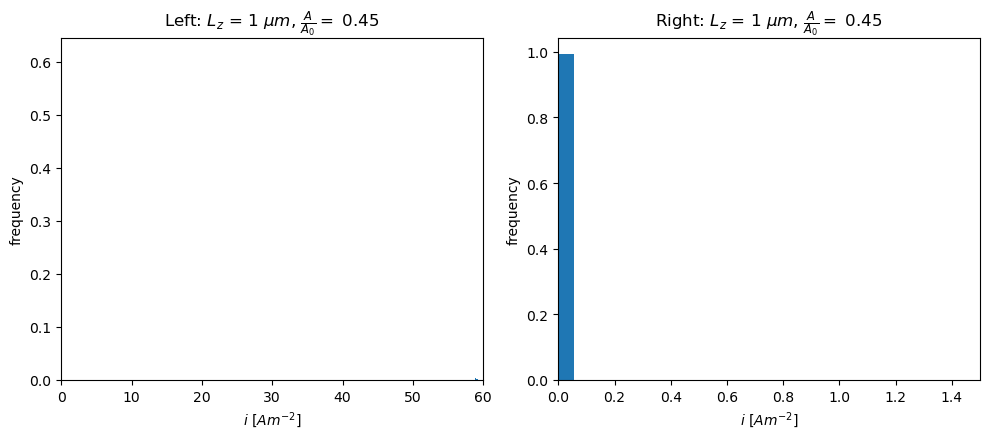

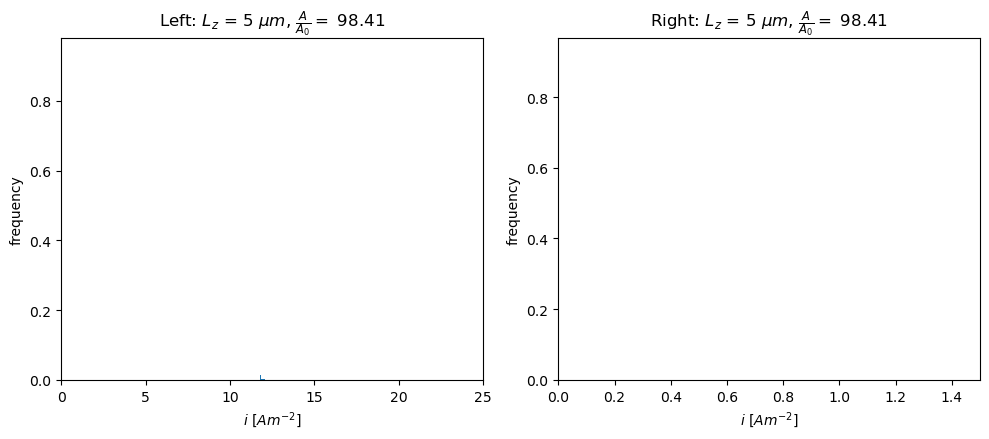

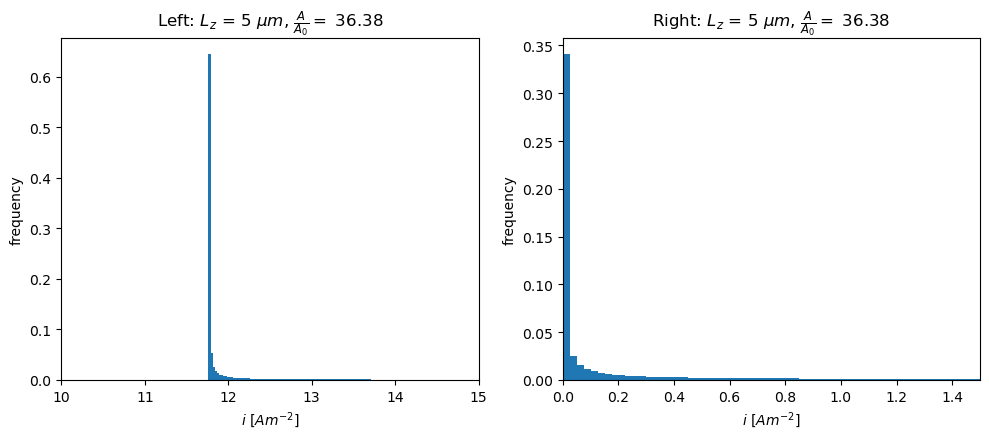

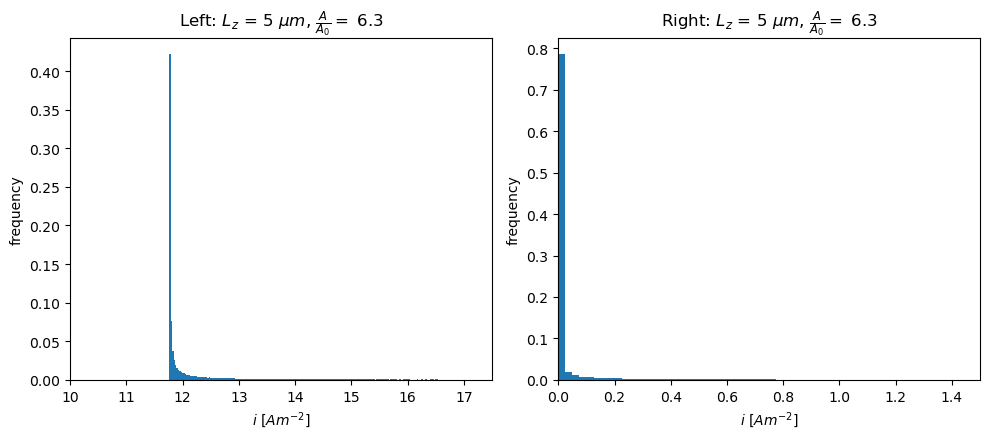

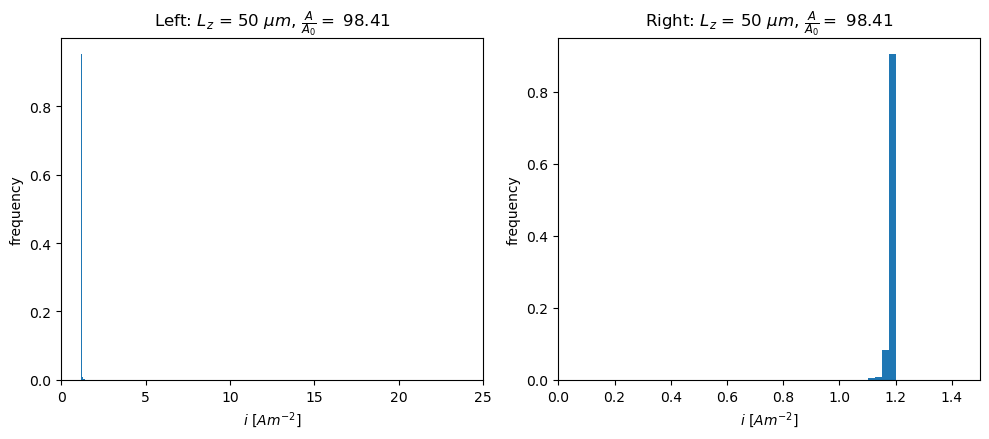

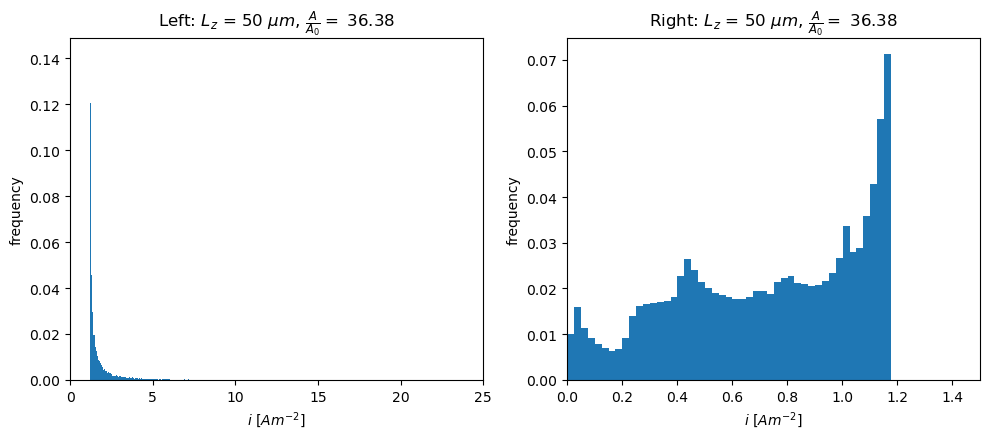

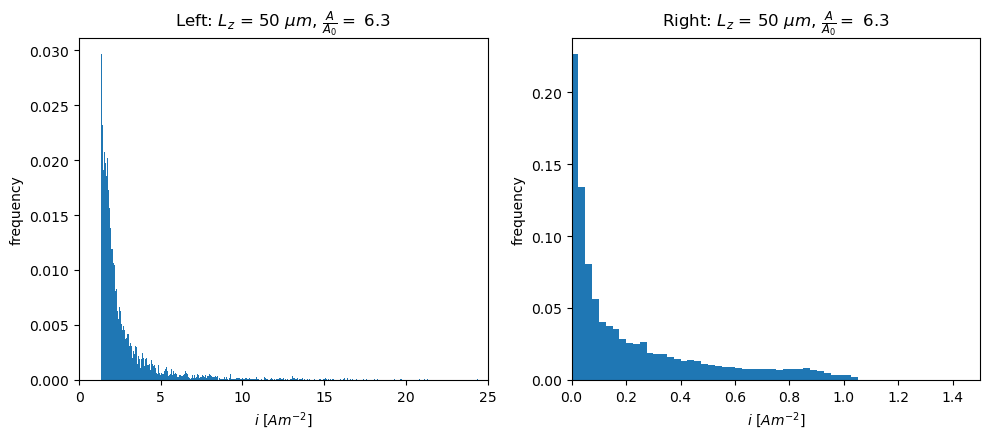

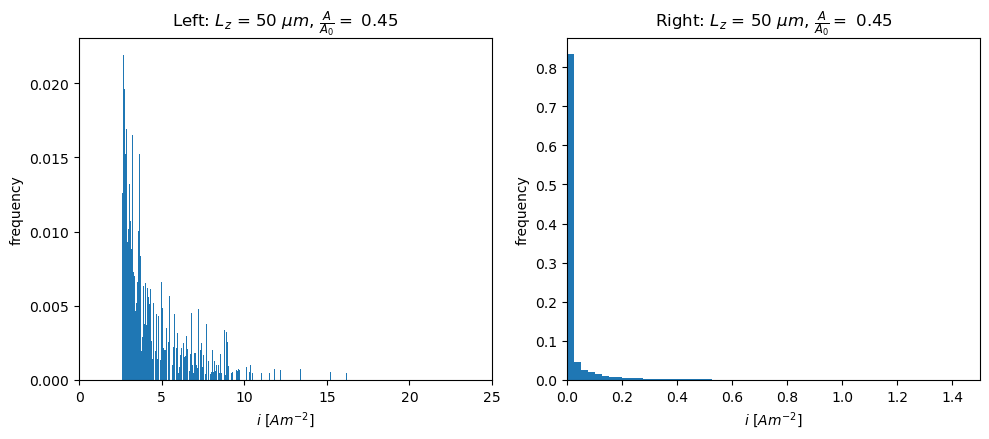

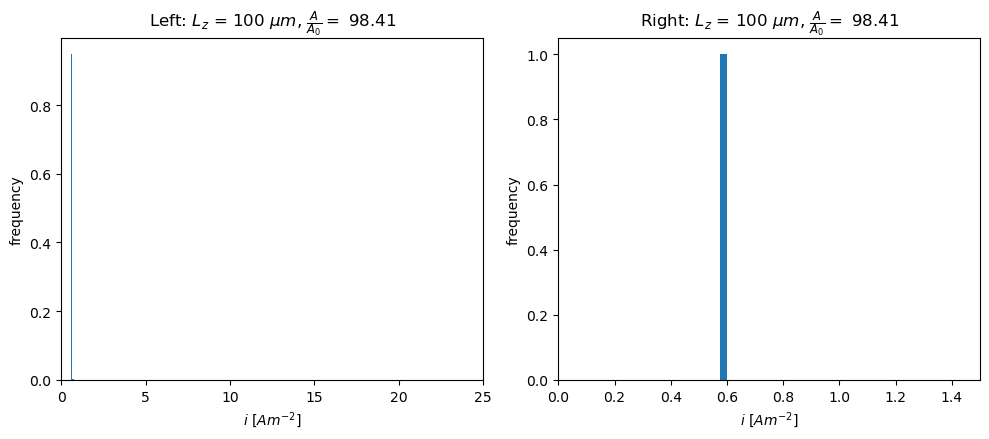

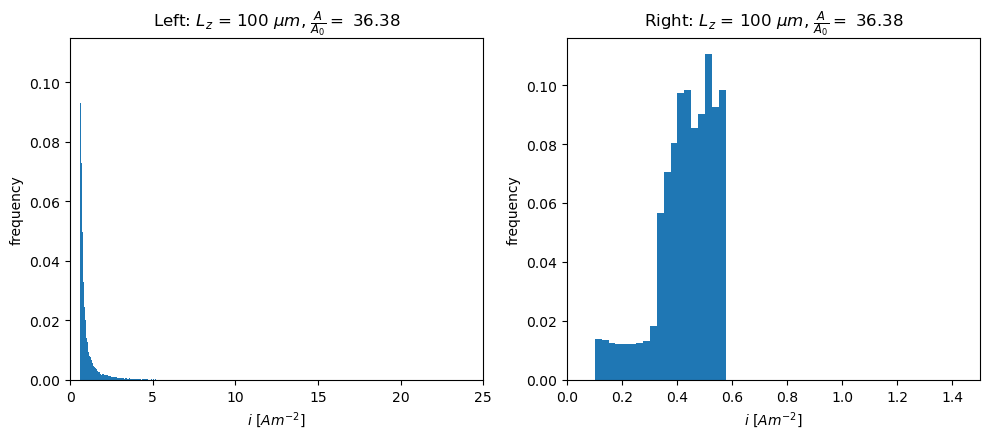

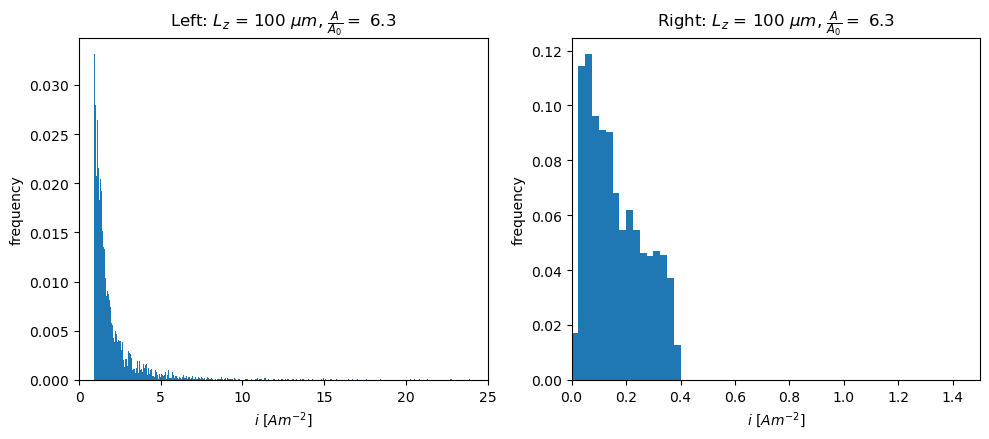

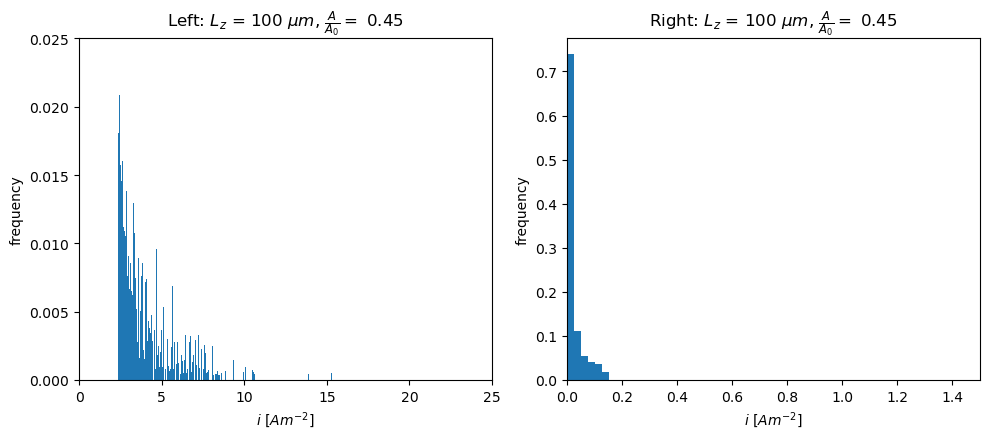

In [4]:
for Lz in [1, 5, 50, 100]:
    for img_id in [6, 11, 16, 22]:
        try:
            make_plot(img_id, Lz)
        except Exception as e:
            print(f"No data for Lz = {Lz} and image id = {img_id}")
            continue